<img src=imagenes_notebook/portada.png><img src=imagenes_notebook/ruta.png>

## Selección de Contexto y Problema

Se escogió el problema con base en los datos disponibles en la plataforma kaggle:

https://www.kaggle.com/datasets/pancachocaliente/calidad-del-aire-en-colombia?select=DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018_20240311.csv

* **Problema específico**

Según la Organización Mundial de la Salud (OMS), se deben monitorear **los contaminantes criterio**, los cuales a través de diversos estudios epidemiológicos se determinaron como perjudiciales para la salud y el bienestar de los humanos, siendo los más comunes: 
- Partículas Suspendidas Totales (PST)
- Material Particulado menor a 10 micras (PM10)
- Material Particulado menor a 2.5 micras (PM2.5)
- Dióxido de Nitrógeno (NO2)
- Dióxido de Azufre (SO2)
- Ozono troposférico (O3)
- Monóxido de Carbono (CO)


* **Impacto del Negocio**

Si los ciudadanos tenemos información que ayude a predecir la contaminación del aire, podremos tomar medidas para proteger nuestra salud



***
* **Definición del Problema**
  
    *Desarrollar un modelo que prediga los niveles en el aire de **los contaminantes criterio** en una región y fechas dadas para tomar medidas preventivas cuando se estime que se alcanzaran valores peligrosos para la salud humana.*

***

## Análisis de Datos Básicos

### 1. Carga y Exploración del Conjunto de Datos

* **Cargar el conjunto de datos en un DataFrame utilizando pandas:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path_data = "CALIDAD_AIRE.csv"
df = pd.read_csv(path_data, low_memory=False)

* **Observar cantidad de filas y columnas:**

In [2]:
print("Cantidad de filas y columnas del dataset: ",df.shape)

Cantidad de filas y columnas del dataset:  (20389245, 16)


* **Mostrar columnas y cantidad de datos por columna:**

In [3]:
df.count()

Fecha                             20389245
Autoridad Ambiental               20389245
Nombre de la estación             20389245
Tecnología                        15657064
Latitud                           20388880
Longitud                          20388880
Código del departamento           20388880
Departamento                      20388880
Código del municipio              20388880
Nombre del municipio              20388880
Tipo de estación                  20388880
Tiempo de exposición              20389245
Variable                          20389245
Unidades                          20389245
Concentración                     19006859
Nueva columna georreferenciada    20388880
dtype: int64

* **Renombrar columnas del dataset:**
Para eliminar espacios, tildes, etc, en las columnas de interés del conjunto de datos.

In [4]:
# Renombrar features con espacios en los nombres
df.rename(columns={'Fecha':'fecha',
                   'Latitud':'latitud',
                   'Longitud':'longitud',
                   'Departamento':'departamento',
                   'Nombre del municipio':'municipio',
                   'Tiempo de exposición':'tiempo_exposicion',
                   'Variable':'variable',
                   'Unidades':'unidades',
                   'Concentración':'concentracion',
                   'Tecnología':'tecnologia',
                   'Tipo de estación':'tipo_estacion'
                  },inplace=True)

* **Visualizar la frecuencia de las variables medidas en el dataset:**

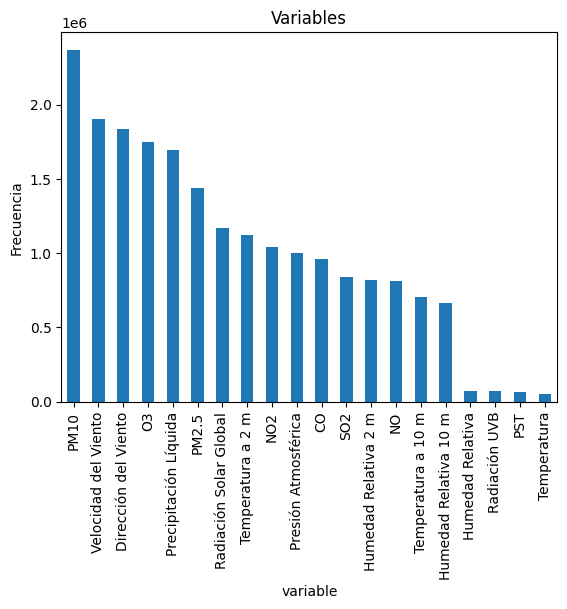

In [5]:
ax = df['variable'].value_counts().plot(kind='bar')
ax.set_title('Variables')
ax.set_ylabel('Frecuencia')
plt.show()

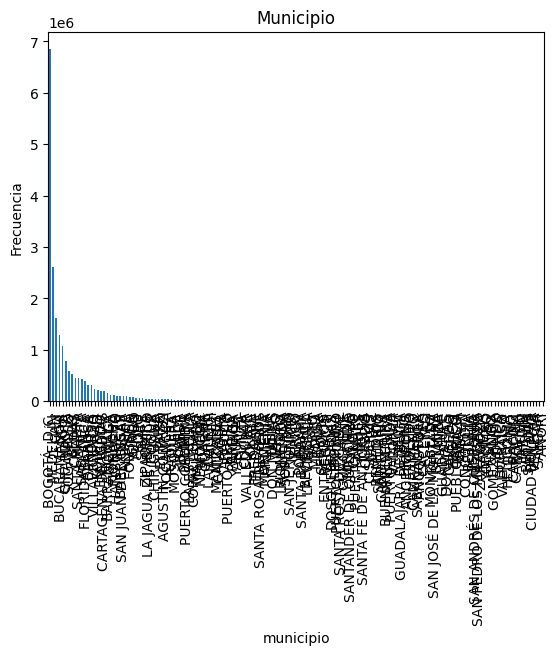

In [7]:
ax = df['municipio'].value_counts().plot(kind='bar')
ax.set_title('Municipio')
ax.set_ylabel('Frecuencia')
plt.show()

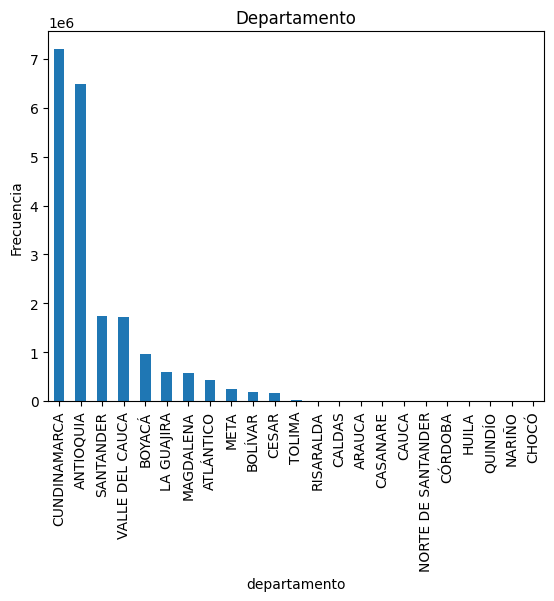

In [6]:
ax = df['departamento'].value_counts().plot(kind='bar')
ax.set_title('Departamento')
ax.set_ylabel('Frecuencia')
plt.show()

### 2. Tipos de Datos

Cualitativos o categóricos:
Representan cualidades o categorías: *Nominales:* No presentan un criterio único para ordenarlos. Ej:  los colores, las materias de un curso, etc. *Ordinales:* tienen un criterio único de orden. Ej: los meses del año, el grado de estudios, el lugar obtenido en un concurso, etc.

Datos cuantitativos:
Datos cuyos valores son números: *Discretos:* Son los que se pueden contar. Ej: el número de respuestas correctas en un examen, los goles anotados en un partido, los lugares disponibles en un auditorio, etc. *Continuos:* Son los que se miden. Ej: el tiempo empleado para resolver un examen, la distancia de un lugar a otro, el peso de una persona, la temperatura ambiental, etc.


* **Identificar los tipos de datos de cada columna (numéricos, categóricos, booleanos, etc.):**

| Columna      | Tipo de dato      |
| ------------- | ------------- |
|Fecha |CUANTITATIVO - Continuo |
|Autoridad Ambiental |CATEGÓRICO - Nominal|
|Nombre de la estación |CATEGÓRICO - Nominal|
|Tecnología |CATEGÓRICO - Nominal|
|Latitud |CUANTITATIVO - Continuo|
|Longitud |CUANTITATIVO - Continuo|
|Código del Departamento |CATEGÓRICO - Ordinal|
|Departamento |CATEGÓRICO - Nominal|
|Código del municipio |CATEGÓRICO- Ordinal|
|Nombre del municipio |CATEGÓRICO - Nominal|
|Tipo de estación |CATEGÓRICO - Nominal|
|Tiempo de exposición| CUANTITATIVO - Continuo|
|Variable |CATEGÓRICO - Nominal|
|Unidades |CATEGÓRICO - Nominal|
|Concentración |CUANTITATIVO - Continuo|
|Nueva columna georreferenciada |CUANTITATIVO - Continuo|


* **Discutir la importancia de los tipos de datos en el análisis y modelado:**
Los tipos de datos son la base para encaminar el proceso del aprendizaje de máquina, se deben tener en cuenta para:

     - Seleccionar los algoritmos adecuados:  Algunos algoritmos funcionan mejor con cierto tipo de datos (regresión lineal - datos continuos, KNN - datos correctamente escalados, etc.)
     - El preprocesamiento de datos depende del tipo: normalización (datos numéricos), vectorización (datos categóricos), etc
     - Conocer los tipos de datos facilita la selección de visualizaciones apropiadas, datos numéricos (histogramas), datos categóricos (barras), etc.
     - El manejo de los valores faltantes depende del tipo de datos.Por ejemplo, numéricos con la media o mediana, categóricos con la moda, etc

    Lo anterior, entre otras consideraciones, **es esencial para obtener un modelo de machine learning robusto y confiable**


### 3. Cantidad de Datos Faltantes

* **Detectar la cantidad de datos faltantes en cada columna:**


In [7]:
print(df.isna().sum()) #valores nulos x columna, tambien puede usarse df.isnull().sum() 

fecha                                   0
Autoridad Ambiental                     0
Nombre de la estación                   0
tecnologia                        4732181
latitud                               365
longitud                              365
Código del departamento               365
departamento                          365
Código del municipio                  365
municipio                             365
tipo_estacion                         365
tiempo_exposicion                       0
variable                                0
unidades                                0
concentracion                     1382386
Nueva columna georreferenciada        365
dtype: int64


* **Conteos, tipos de datos y valores no nulos para cada columna:**

In [8]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20389245 entries, 0 to 20389244
Data columns (total 16 columns):
 #   Column                          Non-Null Count     Dtype  
---  ------                          --------------     -----  
 0   fecha                           20389245 non-null  object 
 1   Autoridad Ambiental             20389245 non-null  object 
 2   Nombre de la estación           20389245 non-null  object 
 3   tecnologia                      15657064 non-null  object 
 4   latitud                         20388880 non-null  float64
 5   longitud                        20388880 non-null  float64
 6   Código del departamento         20388880 non-null  float64
 7   departamento                    20388880 non-null  object 
 8   Código del municipio            20388880 non-null  float64
 9   municipio                       20388880 non-null  object 
 10  tipo_estacion                   20388880 non-null  object 
 11  tiempo_exposicion               20389245 non-nul

* **Discutir sobre el impacto que tiene los datos faltantes en el problema en cuestión en fases más avanzadas del desarrollo del modelo de machine learning:**

La identificación de valores faltantes es un paso crítico en el proceso de limpieza y preparación de datos. Los valores faltantes pueden influir en:

    - Resultados estadísticos: Las operaciones estadísticas como la media, mediana y desviación estándar pueden verse afectadas por la presencia de valores faltantes.

    - Análisis de datos: Los gráficos y visualizaciones pueden ser engañosos si no se manejan adecuadamente los valores faltantes.

    - Modelos de machine learning: Muchos algoritmos de aprendizaje automático no pueden manejar valores faltantes directamente y requieren que estos sean imputados o eliminados.


### 4. Verificación de Reglas de Rango y Dominio

* **Identificar y marcar los datos basura, como valores erróneos o irrelevantes:**
  
  - Datos irrelevantes del set de datos:

| Columna      |
| ------------- |
|Autoridad Ambiental |
|Nombre de la estación |
|Código del Departamento |
|Código del municipio |
|Nueva columna georreferenciada |


   - Registros duplicados:


In [9]:
print(df.duplicated().sum())

8585


* **Revisar valores fuera de un rango esperado o texto en columnas numéricas:**

    - A veces, una columna se carga como tipo object porque contiene mezclas de texto y números, si se detecta que una columna numérica tiene tipo object, es probable que contenga texto. Revisamos entonces las columnas Latitud, Longitud, Concentación que deberian ser numéricas. En este caso los valores son numéricos:

In [10]:
subset = df[["latitud", "longitud", "concentracion"]]
print(subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20389245 entries, 0 to 20389244
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   latitud        float64
 1   longitud       float64
 2   concentracion  float64
dtypes: float64(3)
memory usage: 466.7 MB
None


   - Valores fuera de rango (outliers):
    Se pueden detectar usando el rango intercuartílico (IQR), una medida estadística que representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de un conjunto de datos. Divide los datos en cuatro partes iguales y mide la amplitud del rango central (50% de los datos).

        Q1: El valor en el percentil 25 (25% de los datos están por debajo de este valor).
        Q3: El valor en el percentil 75 (75% de los datos están por debajo de este valor).
        IQR = Q3 - Q1: Rango central de los datos.

     Los valores fuera del rango esperado se calculan usando una distancia de 1.5 veces el IQR:

        Límite inferior: Q1−1.5×IQR
     
        Límite superior: Q3+1.5×IQR

     Los valores que estén fuera de estos límites se consideran **valores atípicos**.
    
     **Valores extremadamente atípicos**: Si se quiere detectar valores mucho más extremos, se puede usar un factor más alto, como 3 × IQR, para definir un segundo rango más amplio. Esto ayuda a diferenciar entre atípicos moderados y extremos.
    
        Límite inferior: Q1−3×IQR
     
        Límite superior: Q3+3×IQR
     
Lo anterior puede visualizarse con **gráficos de caja (boxplots)**, donde:

- El rango intercuartílico está representado por la caja.
- Los límites (bigotes) se extienden hasta Q1−1.5×IQR y Q3+1.5×IQR.
- Los puntos fuera de los bigotes se consideran atípicos.

Revisamos los valores atipicos para los **contaminantes criterio** estudiados:

In [11]:
contaminantes = ['PST', 'PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'CO']  # Contaminantes criterio a estudiar
df_cc = df[df['variable'].isin(contaminantes)]  # data frame de contaminantes criterio

Q1 = df_cc.groupby(['variable', 'tiempo_exposicion'])['concentracion'].quantile(0.25) # Primer cuartil (percentil 25)
Q3 = df_cc.groupby(['variable', 'tiempo_exposicion'])['concentracion'].quantile(0.75)  # Tercer cuartil (percentil 75)

# Calcular el rango intercuartílico
IQR = Q3 - Q1

# Definir límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#print(f"Límite inferior: {limite_inferior}, Límite superior: {limite_superior}")

# Restablecer el índice para los límites calculados
limite_inferior = limite_inferior.reset_index(name='limite_inferior')
limite_superior = limite_superior.reset_index(name='limite_superior')

# Unir los límites al DataFrame original
df_cc = df_cc.merge(limite_inferior, on=['variable', 'tiempo_exposicion'])
df_cc = df_cc.merge(limite_superior, on=['variable', 'tiempo_exposicion'])

# Identificar valores fuera del rango
fuera_de_rango = df_cc[(df_cc['concentracion'] < df_cc['limite_inferior']) | (df_cc['concentracion'] > df_cc['limite_superior'])]

# Mostrar cantidad de valores fuera del rango
print("Valores fuera del rango intercuartílico:")
print(fuera_de_rango.shape)

Valores fuera del rango intercuartílico:
(315026, 18)


In [13]:
# Mostrar valores fuera del rango intercuartil para cada contaminante por tiempo de exposición
print(fuera_de_rango[["tecnologia","variable","tiempo_exposicion","concentracion"]])

         tecnologia variable  tiempo_exposicion  concentracion
365          Manual     PM10                 24      92.800000
567          Manual     PM10                 24      94.800000
568          Manual     PM10                 24      90.800000
569          Manual     PM10                 24     101.100000
929      Automática       O3                  1      98.097596
...             ...      ...                ...            ...
8454286         NaN    PM2.5                  1      68.000000
8454885         NaN    PM2.5                  1      59.000000
8457958         NaN    PM2.5                  1      58.000000
8458484         NaN    PM2.5                  1      64.000000
8460632         NaN    PM2.5                 24      39.920000

[315026 rows x 4 columns]


Se puede observar que hay 315.026 valores fuera de los rangos normales

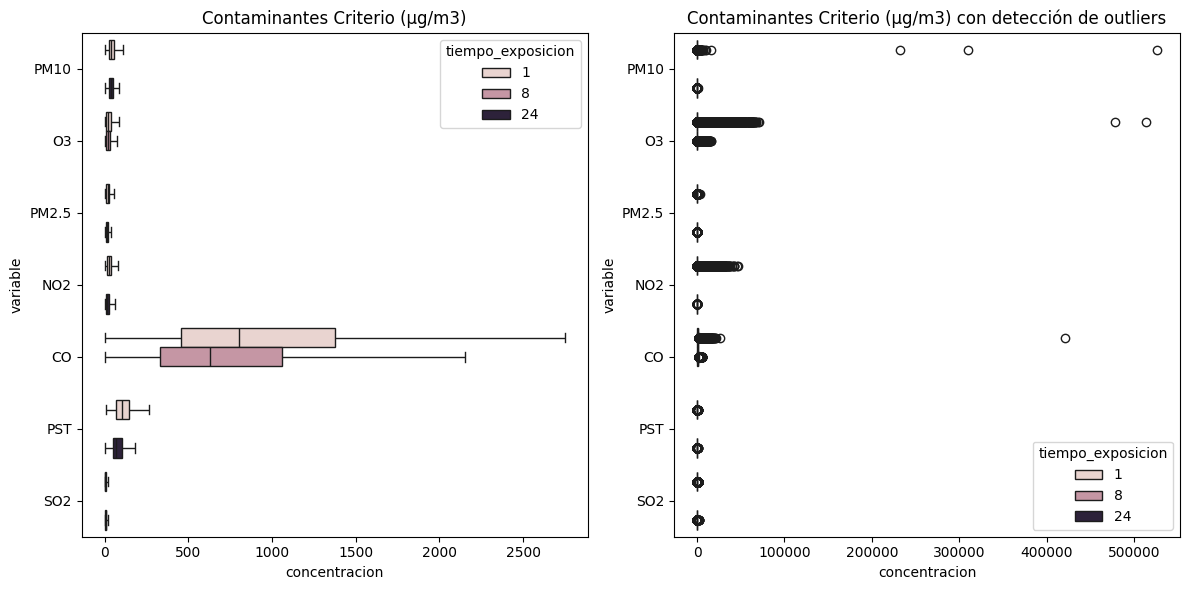

In [14]:
#Visualizamos los valores fuera de rango con graficos de caja
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Añadir títulos y etiquetas a los subplots
axes[0].set_title("Contaminantes Criterio (μg/m3)")
axes[1].set_title("Contaminantes Criterio (μg/m3) con detección de outliers")

sns.boxplot(
    data=df_cc,
    y='variable',               # Contaminantes en el eje y
    x='concentracion',          # Concentración en el eje x
    hue='tiempo_exposicion', # Separar por tiempo de exposición 
    showfliers=False,          # SIN valores atípicos
    ax=axes[0]
)
sns.boxplot(
    data=df_cc,
    y='variable',               
    x='concentracion',          
    hue='tiempo_exposicion',
    showfliers=True,          # Muestra los valores atípicos
    ax=axes[1]
)
plt.tight_layout() # Ajustar el espaciado entre los subplots
# Mostrar el gráfico
plt.show()

Se evidencia la presencia de valores atípicos en casi todas las variables.

Como se puede observar la variable Monóxido de Carbono (CO) tiene un rango de valores mucho mas alto que las otras, se procede entonces a separarla del dataset para observar mejor los otros rangos.

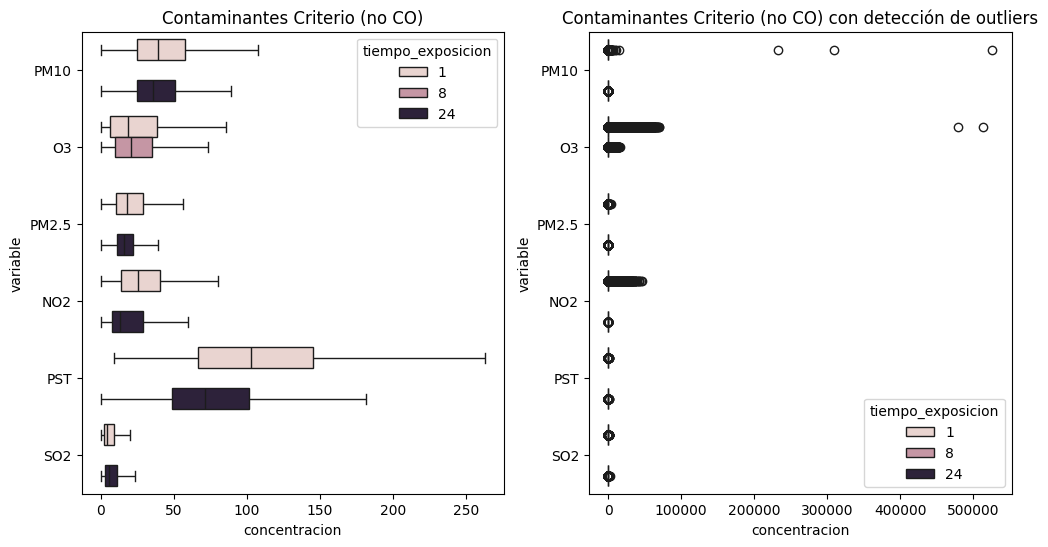

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
axes[0].set_title("Contaminantes Criterio (no CO)")
axes[1].set_title("Contaminantes Criterio (no CO) con detección de outliers")

#Separamos la el contaminante CO del conjunto de variables:
sns.boxplot(data=df_cc[(df_cc.variable !='CO')],
            y='variable',               
            x='concentracion',          
            hue='tiempo_exposicion', 
            showfliers=False,
            ax=axes[0]
)

sns.boxplot(data=df_cc[(df_cc.variable !='CO')],
            y='variable',               
            x='concentracion',          
            hue='tiempo_exposicion', 
            showfliers=True,
            ax=axes[1]
)

plt.show()

* **Discutir estrategias para limpiar los datos basura:**
    * Elimnar registros duplicados del dataset:      

In [16]:
df.drop_duplicates(inplace=True)

* Eliminar las columnas irrelevantes:

In [17]:
#Eliminar columnas irrelevantes, axis=1 indica que se eliminan las columnas, 0 las filas
df.drop([
    'Autoridad Ambiental', 'Nombre de la estación','Código del departamento', 
    'Código del municipio', 'Nueva columna georreferenciada'
], axis=1, inplace=True) 

 * Eliminar los registros donde las columnas latitud, longitud, departamento y municipio; tengan valores nulos, ya que si estos datos no estan presentes no tiene sentido reemplazarlos.

In [18]:
print(df.isna().sum()) #Visualizar el dataset para comprobar valores nulos en columnas que no los permitan

fecha                      0
tecnologia           4723611
latitud                  365
longitud                 365
departamento             365
municipio                365
tipo_estacion            365
tiempo_exposicion          0
variable                   0
unidades                   0
concentracion        1373816
dtype: int64


In [22]:
df.dropna(subset = ['latitud', 'longitud', 'departamento', 'municipio'], inplace=True)

---***Las siguientes estrategias no se aplicarán al dataframe, con el proposito de realizar el ejercicio académico de Detección y Tratamiento de Datos Ausentes***---
 
 * Eliminar los registros donde la columna Concentración tenga valores nulos, esto para que el modelo sea mas fiel a los datos reales de contaminantes del aire medidos.
   
* Valores fuera de rango: una forma común de manejar los valores fuera de rango es reemplazarlos por un valor válido, como la media, la mediana, o un valor predeterminado, sin embargo, en este caso los valores fuera de rango estan muy alejados del límite superior del rango intercuartilico y puede concluirse que se trata de **valores atípicos** que podrían ser eliminados.

* Para verificar que los valores atípicos son muy inusuales podría construirse un filtro basado en la estandarización (z-scores), que puede ayudar a detectar valores inusuales en grandes volúmenes de datos.

### 5. Dimensiones de la Calidad de Datos

* **Evaluar la completitud, consistencia y exactitud de los datos**
  
    * **Completitud:** Mide si todos los datos necesarios están presentes en el conjunto de datos. En este caso se requieren la informacion de los contaminates Partículas Suspendidas Totales (PST), Material Particulado menor a 10 micras (PM10), Material Particulado menor a 2.5 micras (PM2.5), Dióxido de Nitrógeno (NO2), Dióxido de Azufre (SO2), Ozono troposférico (O3), Monóxido de Carbono (CO) en un rango de fechas amplio, medidos tanto en 1 hora, 8 horas o 24 horas dependiendo del contaminante (Tiempo de exposición). En el análisis del dataset se concluye que estos datos estan presentes.
      
    * **Consistencia:**  Se refiere a la coherencia de los datos en todo el conjunto de datos. La unidad de medida de los contaminantes criterio es microgramo por metro cúbico (µg/m³). Esto se verifica al revisar la columna 'Unidades' para los contaminantes criterios estudiados, donde no hay valores nulos y la unidad de medida es la misma. 
      
    * **Exactitud:** Mide si los datos representan correctamente la realidad. Las concentraciones medidas para los contaminantes deben reflejar que la mayoria de los valores se encuentran entre los rangos usualmente presentados para estos contaminantes. Esto puede verificarse al analizar el rango intercuartil pues el 75% de los datos corresponden a valores que usualmente se miden.

In [20]:
#Consistencia del conjunto de datos
contaminantes = ['PST', 'PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'CO']  # Contaminantes criterio a estudiar
df_cc = df[df['variable'].isin(contaminantes)]  # data frame de contaminantes criterio
print(df_cc['unidades'].unique())

['µg/m3' 'ugm3']


### 6. Detección y Tratamiento de Datos Ausentes:

* **Identificar los datos faltantes:**
- Definir cuales son los contaminantes criterio que tienen datos faltantes.
- Determinar cual es el mecanismo detras de la perdida de datos. Estos mecanismos pueden ser Datos Faltantes Completamente Aleatorios (MCAR), Datos Faltantes No Aleatorios (MNAR) y Datos Faltantes Aleatorios (MAR).

In [23]:
print(df.isna().sum())

fecha                      0
tecnologia           4723246
latitud                    0
longitud                   0
departamento               0
municipio                  0
tipo_estacion              0
tiempo_exposicion          0
variable                   0
unidades                   0
concentracion        1373560
dtype: int64


Para econtrar el mecanismo de la perdida de datos, analizamos la relacion de los valores nulos, comparando la columna ***tecnologia*** con la columna ***concentracion***.

Primero revisamos los valores de la columna tecnología, que nos indica como fueron adquiridos los datos de concentración, que normalmente se toman de forma manual o automática:

In [24]:
print(df.tecnologia.unique())

['Manual' 'Automática' nan]


Lo anterior nos indica que hay registros que no tiene información acerca de como fueron adquiridos.

Procedemos a analizar si los valores nulos de la columna ***concentracion*** coinciden con los valores nulos de la columna ***tecnologia***

In [3]:
print(df_nulls = df[df['tecnologia'].isnull() & df['concentracion'].isnull()])

NameError: name 'df' is not defined

Se encuentran **1'373.560** registros que coinciden con el numero total de registros nulos de la columna ***concentracion***. Es decir que todos los valores nulos en concentracion coinciden con valores nulos en ***tecnologia***; podriamos suponer que la falta de datos en *concentracion* está relacionada con la falta de datos en *tecnologia* y esto mostraria que la pérdida de datos en este caso es **no aleatoria (MNAR)**, ya que los valores faltantes en *concentracion* parecen estar directamente relacionados con los valores faltantes en *tecnologia*.

Sin embargo, hay valores **no nulos** en *concentracion* cuando *tecnologia* es nulo, pudiendo sugerir que la presencia de valores de *concentracion* **no** está directamente relacionada con la falta de *tecnología*, lo que podría indicar una de las siguientes situaciones:

- **Datos Faltantes Completamente Aleatorios MCAR** (Missing Completely At Random): La ausencia de valores en *tecnologia* y la presencia de valores en *concentracion* ocurren de manera completamente aleatoria, sin influencia mutua.

- **Posible inconsistencia de datos**: Puede haber errores o inconsistencias en los datos, lo que genera registros en concentracion sin una tecnología asociada.

* **Técnicas de descarte e imputación:**

**- Descarte:** se realiza para cuando los datos faltantes no son aleatorios (MNAR), y no son superiores al 10% del total de datos. 

**- Imputación:** se aplica cuando existan datos faltantes aleatorios (MAR) o completamente aleatorios (MCAR). Las tecnicas de imputacion toman los valores de los datos vecinos para estimar aproximadamente el valor del dato faltante. Idealmente la imputacion no debe cambiar la distribucion de los datos.

<img src=imagenes_notebook/distribucion.png>

Antes de seleccionar el método de imputacion, revisemos las variables con valores faltantes y las estadisticas descriptivas del set de datos para los contaminantes criterio a estudiar y las otras variables medidas:|

In [1]:
#Valores faltantes
grouped_df = df.groupby(['variable', 'tiempo_exposicion']) # Agrupar los datos por 'variable' y 'tiempo_exposicion'
resultado = grouped_df['concentracion'].apply(lambda x: x.isna().sum()).reset_index(name='cantidad_nulos')
print(resultado)

Estadisticas descriptivas:

In [ ]:
resumen_estadistico = df.groupby(['variable', 'tiempo_exposicion'])['concentracion'].describe()
print(resumen_estadistico)

**- Selección de técnica de imputacion:** Se revisan solamente las tecnicas de imputacion simple.

- Imputación por la media, mediana o moda:
    - Cuándo usarla: Para variables numéricas cuando se asume que los datos faltantes son completamente aleatorios (MCAR).
    - Ventajas: Simple y fácil de implementar.
    - Desventajas: Puede subestimar la varianza y no es adecuada si hay valores atípicos.
      

- Imputación por regresión:
    - Cuándo usarla: Para variables numéricas cuando existe una relación lineal entre la variable con datos faltantes y otras variables.
    - Ventajas: Utiliza la información de otras variables para hacer una estimación más precisa.
    - Desventajas: Asume una relación lineal y puede ser sesgada si el modelo de regresión no es adecuado.
      

- Imputación por Hotdeck el vecino más cercano (k-NN):
    - Cuándo usarla: Encuentra los k registros más cercanos al registro con datos faltantes y utiliza sus valores para estimar el valor faltante.
    - Ventajas: Flexible y puede capturar relaciones no lineales.
    - Desventajas: Sensible a la elección de k y a la escala de las variables.
      

Para este caso **se selecciona la imputacion por media**, ya que los datos faltantes son **completamente aleatorios (MCAR)**. Se descarta la imputacion por regresion dado que no existe una relación lineal entre la concentracion de las variables de calidad del aire medidas con datos faltantes y otras variables.